In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True) 
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# survival rate

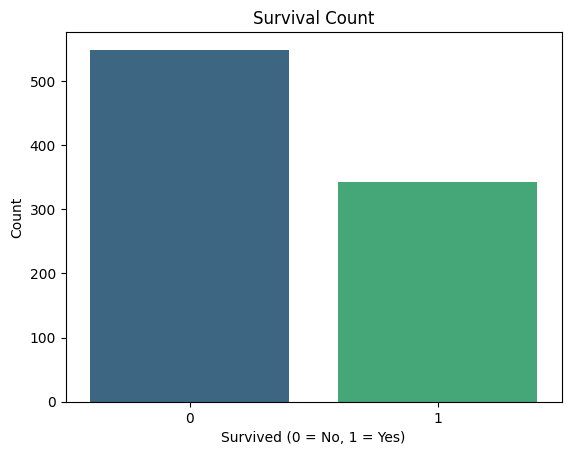

Survival Rate: 38.38%


In [9]:
# Survival distribution
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival rate
survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")

# Survival by Gender

# survival rate is higher in females than males.

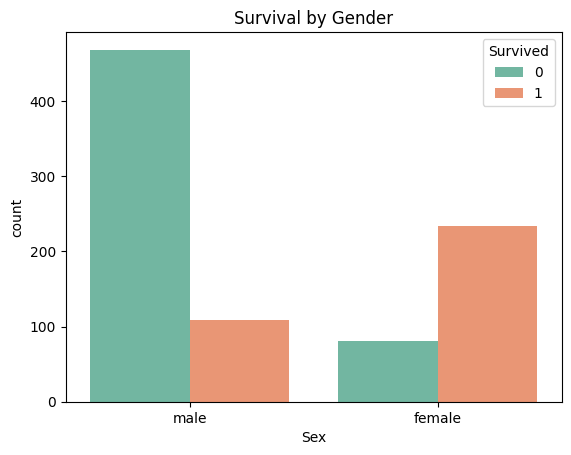

In [10]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Gender")
plt.show()

# Class and Survival
# passengers in 1st class have higher survival rates compared to 2nd and 3rd class.

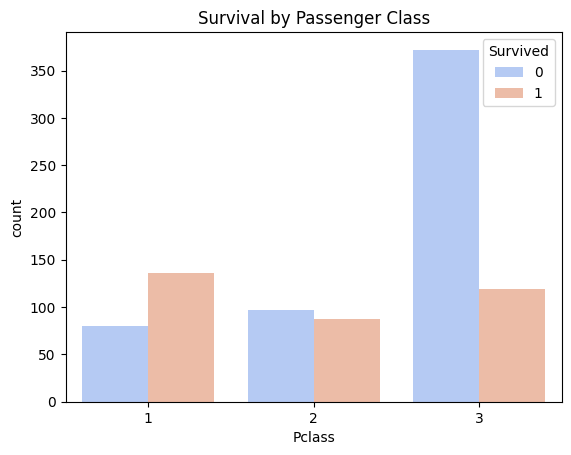

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution
# younger passengers are likely to survive

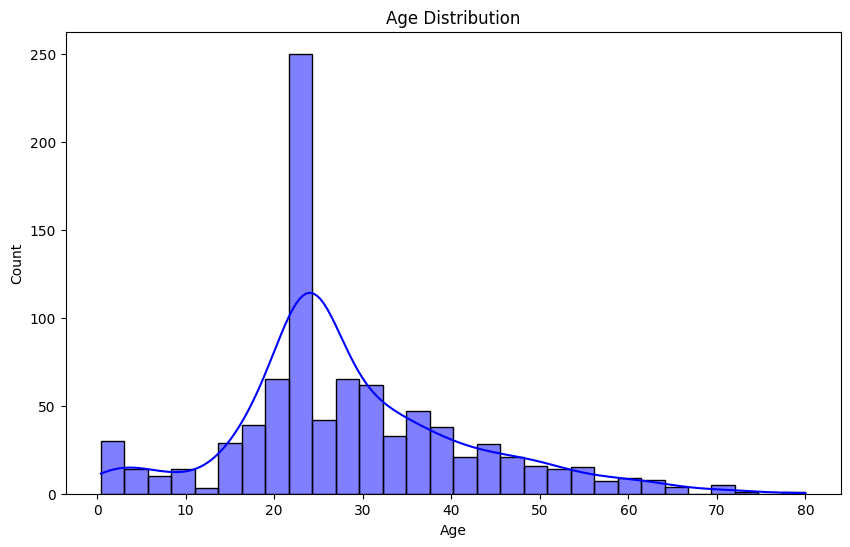

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

# Survival by Age

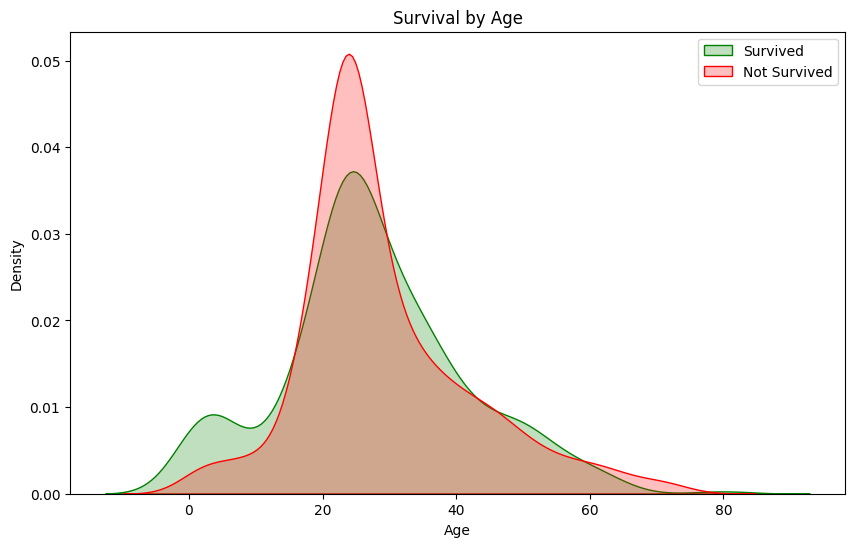

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label='Survived', shade=True, color='green')
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label='Not Survived', shade=True, color='red')
plt.title("Survival by Age")
plt.legend()
plt.show()

# Fare Distribution by Survival
# higher fares are associated with better survival odds

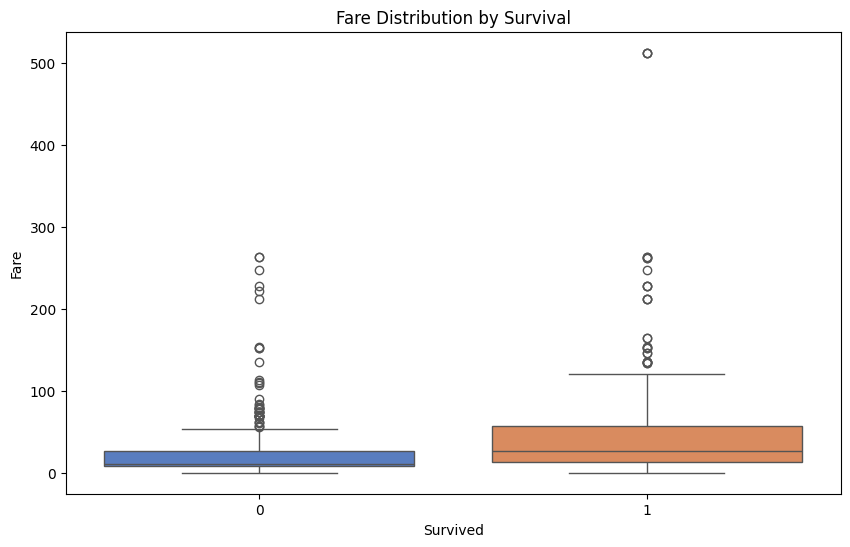

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='muted')
plt.title("Fare Distribution by Survival")
plt.show()

# Embarked and Survival

Passengers from Port C have higher survival rates

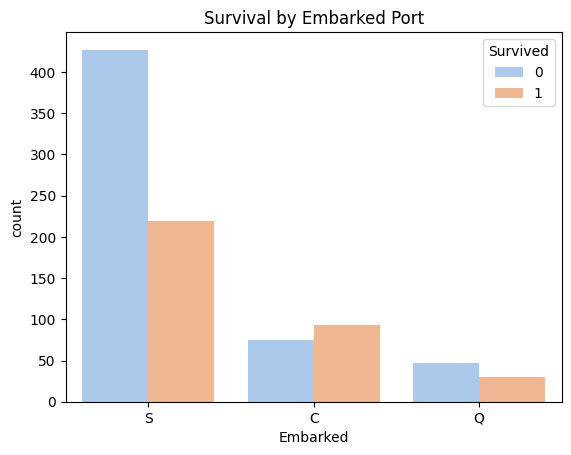

In [15]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title("Survival by Embarked Port")
plt.show()